In [1]:
import warnings

import matplotlib_inline.backend_inline
import seaborn as sns

warnings.filterwarnings("ignore")  # Ignore warnings for the purpose of this tutorial

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("png", dpi=200)

# Getting started
Once FluidSF is installed, you can load the module into Python and run some basic calculations with random data.

### Create a 2D velocity field

We will generate u and v velocity arrays that increase linearly in x. The v velocity will be half the magnitude of the u velocity.

In [2]:
import numpy as np

nx, ny = 100, 100
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

u = X
v = 0.5 * X

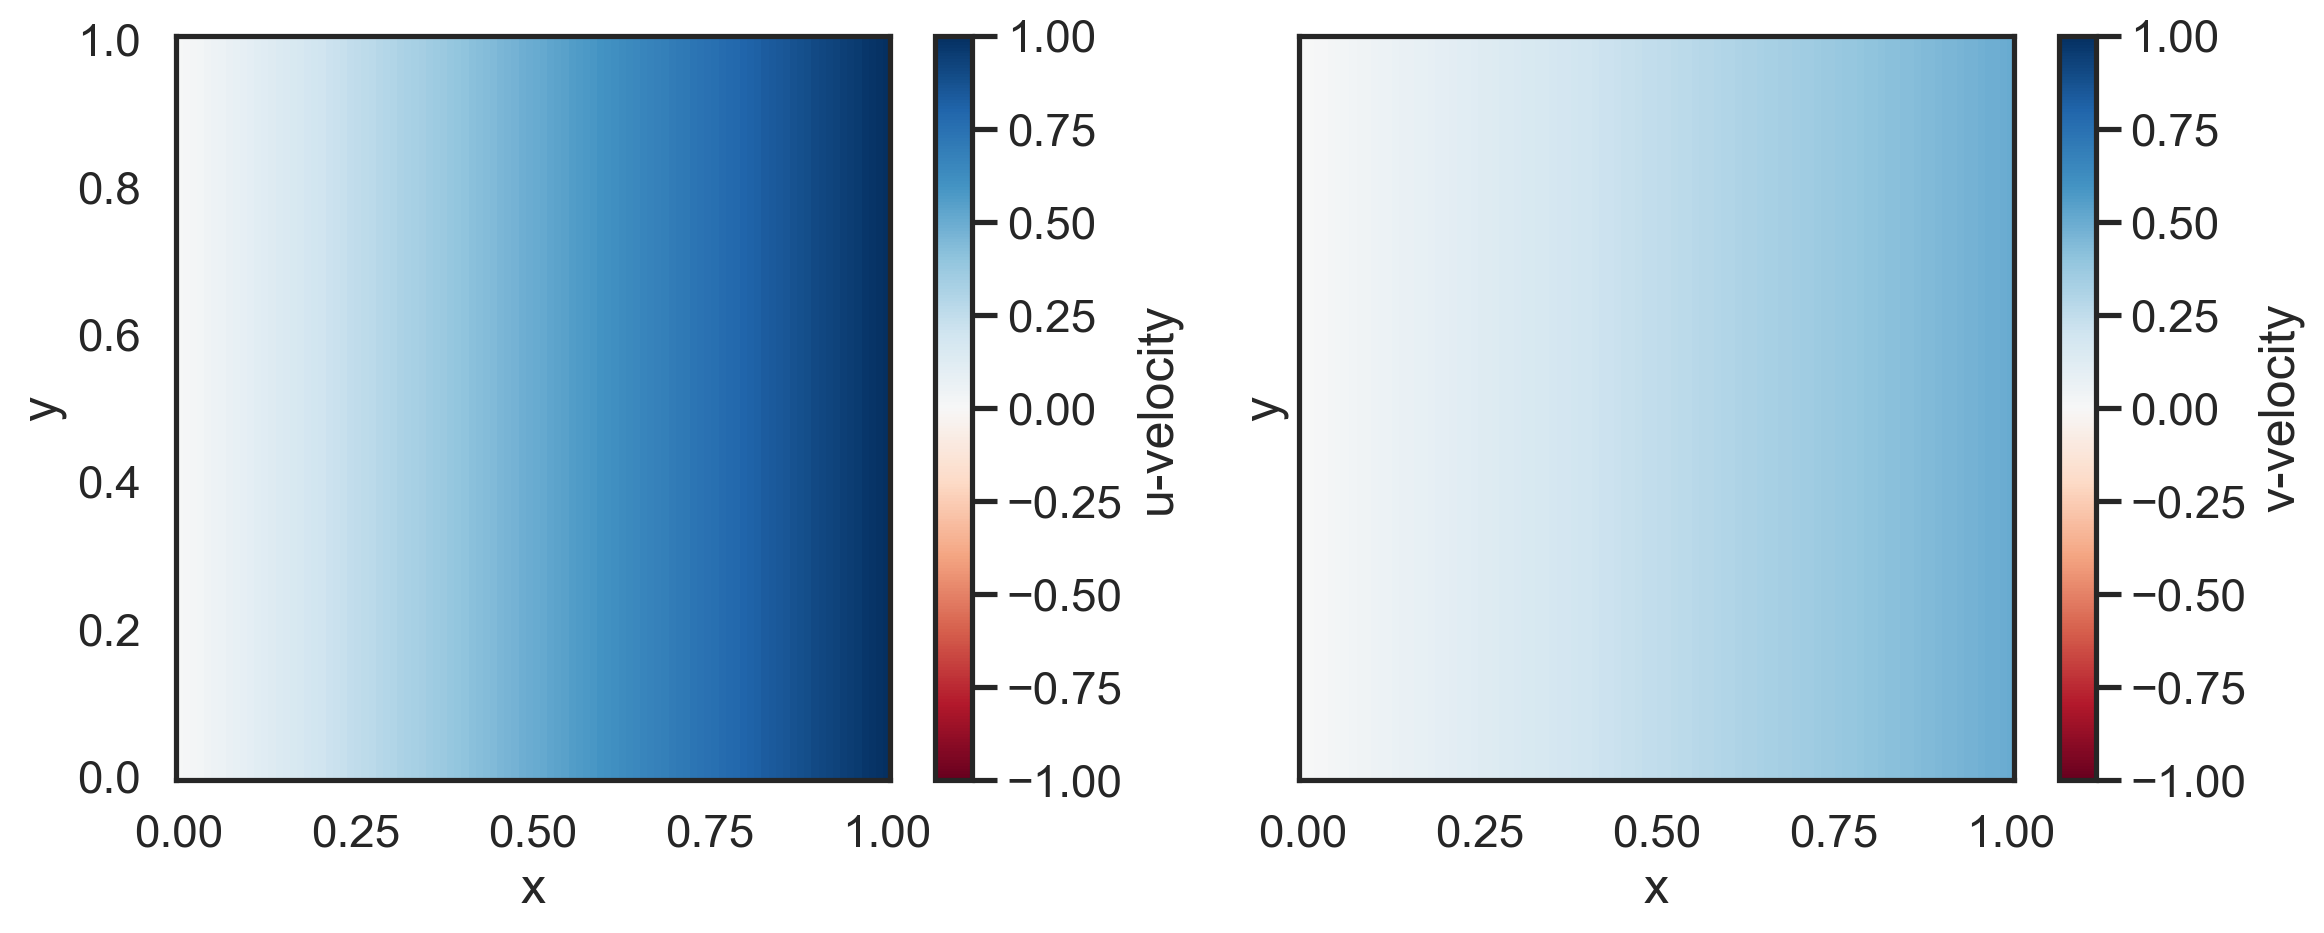

In [3]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))
p1 = ax1.pcolormesh(x, y, u, cmap="RdBu", vmin=-1, vmax=1)
p2 = ax2.pcolormesh(x, y, v, cmap="RdBu", vmin=-1, vmax=1)
fig.colorbar(p1, label="u-velocity")
fig.colorbar(p2, label="v-velocity")
ax1.set_xlabel("x")
ax2.set_xlabel("x")
ax1.set_ylabel("y")
ax2.set_ylabel("y")
plt.tight_layout()

### Generate the velocity structure function

We can generate structure function using the function `generate_structure_functions_2d`. The function returns a dictionary with the all supported structure functions and separation distances in each direction. 

By default the advective velocity structure functions are calculated and the remaining structure functions are set to `None`. To calculate all velocity structure functions we set `sf_type=["ASF_V", "LLL", "LL", "LTT"]`. 

We set the boundary condition to `None` because our random data is non-periodic. If we had periodic data we could set the boundary condition based on the direction of periodicity (i.e. `boundary="periodic-x"` or `boundary="periodic-y"` or `boundary="periodic-all"` for 2D data). 

In [4]:
import fluidsf

sf = fluidsf.generate_structure_functions_2d(
    u, v, x, y, sf_type=["ASF_V", "LLL", "LL", "LTT"], boundary=None
)

The keys of the dictionary `sf` are 

- `SF_advection_velocity_dir`: Advective velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_advection_scalar_dir`: Advective scalar structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LL_dir`: Longitudinal second order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LLL_dir`: Longitudinal third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LTT_dir`: Longitudinal-transverse-transverse third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `SF_LSS_dir`: Longitudinal-scalar-scalar third order velocity structure function in the direction of the separation vector (`dir` = `x`, `y`, `z`).
- `dir-diffs`: Separation distances in each direction (`dir` = `x`, `y`, `z`).

### Plot the advective velocity structure functions in x and y

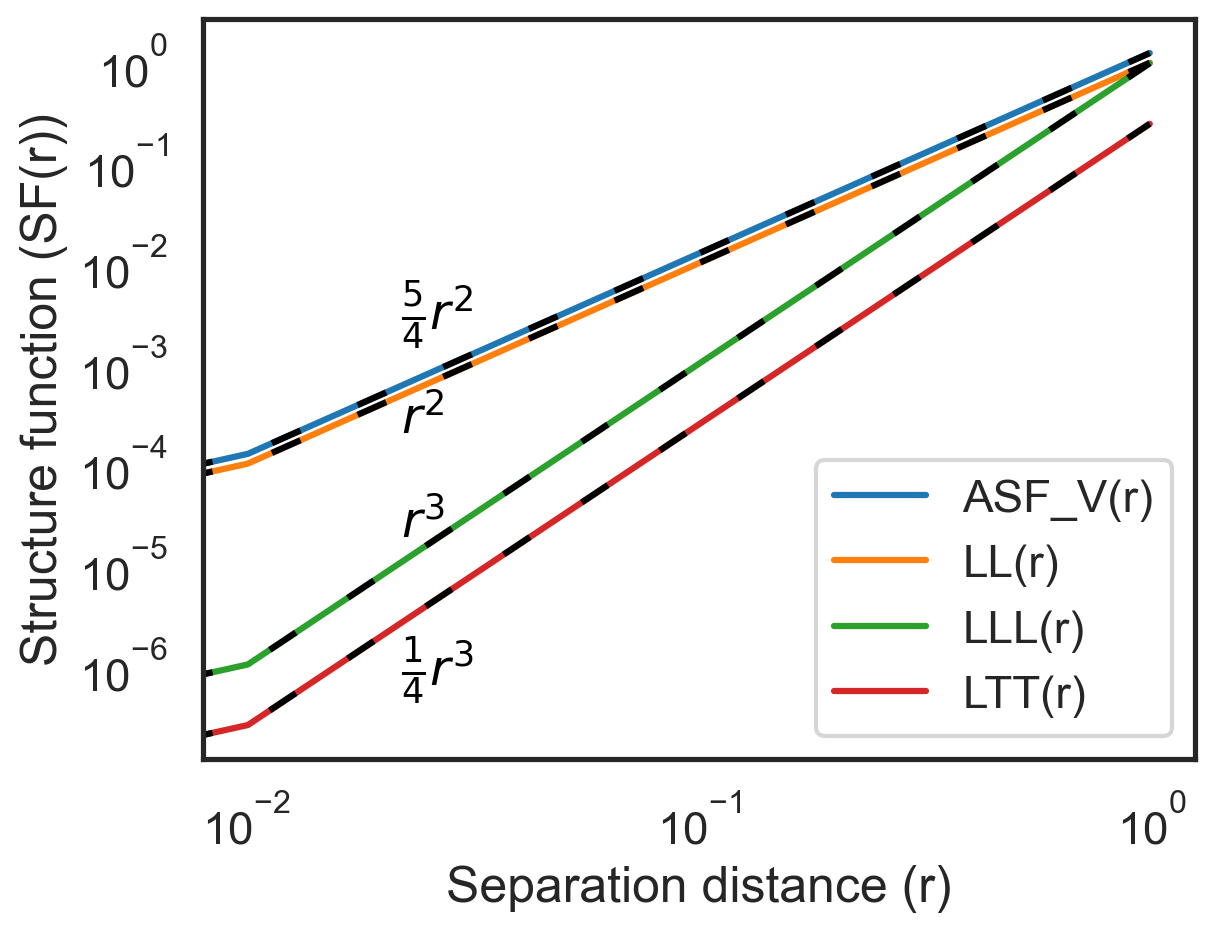

In [5]:
fig, ax = plt.subplots()
ax.loglog(sf["x-diffs"], sf["SF_advection_velocity_x"], label="ASF_V(r)", color="C0")
ax.loglog(sf["x-diffs"], sf["SF_LL_x"], label="LL(r)", color="C1")
ax.loglog(sf["x-diffs"], sf["SF_LLL_x"], label="LLL(r)", color="C2")
ax.loglog(sf["x-diffs"], sf["SF_LTT_x"], label="LTT(r)", color="C3")
ax.loglog(
    sf["x-diffs"],
    (5 / 4) * sf["x-diffs"] ** 2,
    color="k",
    linestyle=(0, (5, 10)),
)
ax.loglog(sf["x-diffs"], sf["x-diffs"] ** 2, color="k", linestyle=(0, (5, 10)))
ax.loglog(sf["x-diffs"], sf["x-diffs"] ** 3, color="k", linestyle=(0, (5, 10)))
ax.loglog(
    sf["x-diffs"],
    0.25 * sf["x-diffs"] ** 3,
    color="k",
    linestyle=(0, (5, 10)),
)

ax.annotate(
    r"$\frac{5}{4}r^{2}$",
    (0.2, 0.58),
    textcoords="axes fraction",
    color="k",
)

ax.annotate(
    r"$r^{2}$",
    (0.2, 0.44),
    textcoords="axes fraction",
    color="k",
)

ax.annotate(
    r"$r^{3}$",
    (0.2, 0.3),
    textcoords="axes fraction",
    color="k",
)

ax.annotate(
    r"$\frac{1}{4}r^{3}$",
    (0.2, 0.1),
    textcoords="axes fraction",
    color="k",
)

plt.hlines(0, 0, 1, color="k", lw=1, zorder=0)
ax.set_xlabel("Separation distance (r)")
ax.set_ylabel("Structure function (SF(r))")
ax.legend(loc="lower right")
plt.show()

### Scalar structure functions
The scalar structure functions can be generated by including `"ASF_S"` and/or `"LSS"` in `sf_type`.

In [6]:
S = X + Y

sf = fluidsf.generate_structure_functions_2d(
    u, v, x, y, sf_type=["ASF_S", "LSS"], scalar=S, boundary=None
)

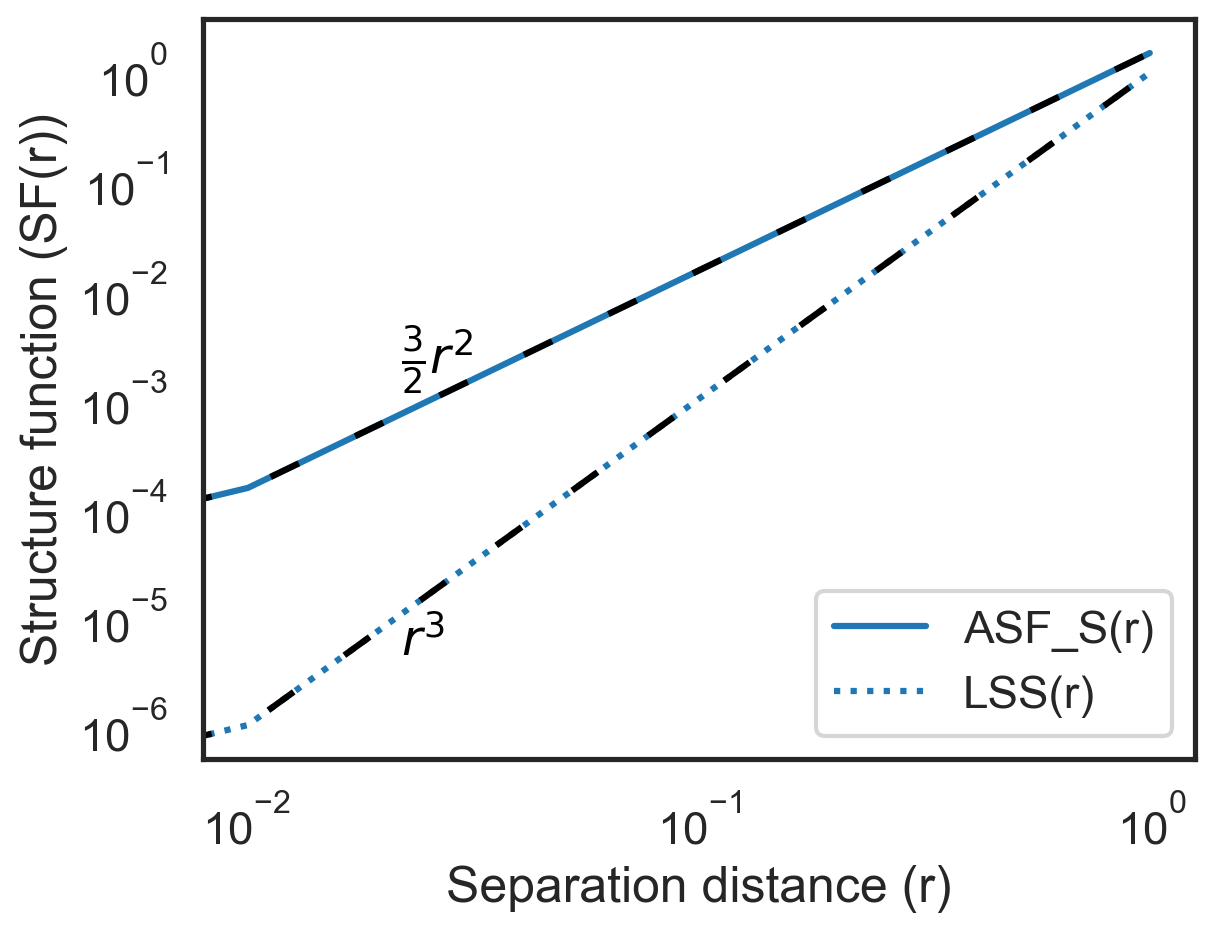

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.loglog(
    sf["x-diffs"],
    sf["SF_advection_scalar_x"],
    label="ASF_S(r)",
    color="tab:blue",
)

ax.loglog(
    sf["x-diffs"],
    sf["SF_LSS_x"],
    label="LSS(r)",
    color="tab:blue",
    linestyle="dotted",
)

ax.loglog(
    sf["x-diffs"], (3 / 2) * sf["x-diffs"] ** 2, color="k", linestyle=(0, (5, 10))
)
ax.loglog(sf["x-diffs"], sf["x-diffs"] ** 3, color="k", linestyle=(0, (5, 10)))

ax.annotate(
    r"$\frac{3}{2}r^{2}$",
    (0.2, 0.52),
    textcoords="axes fraction",
    color="k",
)

ax.annotate(
    r"$r^{3}$",
    (0.2, 0.14),
    textcoords="axes fraction",
    color="k",
)

plt.hlines(0, 0, 1, color="k", lw=1, zorder=0)
ax.set_xlabel("Separation distance (r)")
ax.set_ylabel("Structure function (SF(r))")
ax.legend(loc="lower right")
plt.show()